In [1]:
from PIL import Image
import numpy as np
from scipy.ndimage import filters
import scipy.misc
import warnings
warnings.filterwarnings("ignore")


def plane_sweep_ncc(im_l, im_r, start, steps, wid):
    """ Use cross-correlation of NCC to compute disparity map """
    m, n = im_l.shape
    # Save different sums
    mean_l = np.zeros((m, n))
    mean_r = np.zeros((m, n))

    s = np.zeros((m, n))
    s_l = np.zeros((m, n))
    s_r = np.zeros((m, n))
    # Save the disparity maps
    dmaps = np.zeros((m, n, steps))
    # Computer the average of images' trunks
    filters.uniform_filter(im_l, wid, mean_l)
    filters.uniform_filter(im_r, wid, mean_r)
    # Normalize the picture
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # Try different disparities
    for displ in range(steps):
        # make left image move to the right and summarize them
        filters.uniform_filter(
             np.roll(norm_l, -displ - start) * norm_r, wid, s)  # NCC
        filters.uniform_filter(
            np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start),
            wid, s_l)
        filters.uniform_filter(norm_r * norm_r, wid, s_r)  # anti-NCC
        # Save the grade of NCC
        dmaps[:, :, displ] = s / np.sqrt(s_l * s_r)
    # Choose best pixel for every sub-pictures
    return np.argmax(dmaps, axis=2)

In [2]:
def plane_sweep_gauss(im_l, im_r, start, steps, wid):
    """ Use cross-correlation with Gaussian filter to compute disparity map """
    m, n = im_l.shape
    # Save different sums
    mean_l = np.zeros((m, n))
    mean_r = np.zeros((m, n))

    s = np.zeros((m, n))
    s_l = np.zeros((m, n))
    s_r = np.zeros((m, n))

    # Save the disparity maps
    dmaps = np.zeros((m, n, steps))
    #  Computer the average
    filters.gaussian_filter(im_l, wid, 0, mean_l)
    filters.gaussian_filter(im_r, wid, 0, mean_r)
    # Normalize the picture
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # Try different disparities
    for displ in range(steps):
        # make left image move to the right and summarize them
        filters.gaussian_filter(
            np.roll(norm_l, -displ - start) * norm_r, wid, 0, s)  # Normalize
        filters.gaussian_filter(
            np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start),
            wid, 0, s_l)
        filters.gaussian_filter(norm_r * norm_r, wid, 0, s_r)  # Anti-normalize
        # Save the grade of NCC
        dmaps[:, :, displ] = s / np.sqrt(s_l * s_r)
    # Choose best pixel for every sub-pictures
    return np.argmax(dmaps, axis=2)

## Corridor dispariry map

In [3]:
im_l = np.array(Image.open('../pictures/corridorl.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/corridorr.jpg').convert('L'), 'f')
# Set steps and starts
steps = 12
start = 4
# Set the length of ncc
wid = 9
res = plane_sweep_ncc(im_l, im_r, start, steps, wid)
scipy.misc.imsave('../pictures/depth_corridor.jpg', res)

In [4]:
# Set steps and starts
steps = 12
start = 4
# Set the length of ncc
wid = 3
res = plane_sweep_gauss(im_l, im_r, start, steps, wid)
scipy.misc.imsave('../pictures/depth_corridor_gauss.jpg', res)

### Compare the original images with the depth maps

In [5]:
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplot(2, 2, 1)
plt.title("corridorl.jpg")
plt.imshow(Image.open("../pictures/corridorl.jpg"), cmap="gray")

plt.subplot(2, 2, 2)
plt.title("corridorr.jpg")
plt.imshow(Image.open("../pictures/corridorr.jpg"), cmap="gray")

plt.subplot(2, 2, 3)
plt.title("depth_corridor.jpg")
plt.imshow(Image.open("../pictures/depth_corridor.jpg"), cmap="gray")

plt.subplot(2, 2, 4)
plt.title("depth_corridor_gauss.jpg")
plt.imshow(Image.open("../pictures/depth_corridor_gauss.jpg"), cmap="gray")

plt.savefig("../pictures/corridor_4comparisons.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Triclopsi2 disparity map

In [6]:
im_l = np.array(Image.open('../pictures/triclopsi2l.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/triclopsi2r.jpg').convert('L'), 'f')
# Set steps and starts
steps = 12
start = 4
# nc# Set the length of ncc
wid = 9
res = plane_sweep_ncc(im_l, im_r, start, steps, wid)
scipy.misc.imsave('../pictures/depth_triclopsi2.jpg', res)

# Set steps and starts
steps = 12
start = 4
# Set the length of ncc
wid = 3
res = plane_sweep_gauss(im_l, im_r, start, steps, wid)
scipy.misc.imsave('../pictures/depth_triclopsi2_gauss.jpg', res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

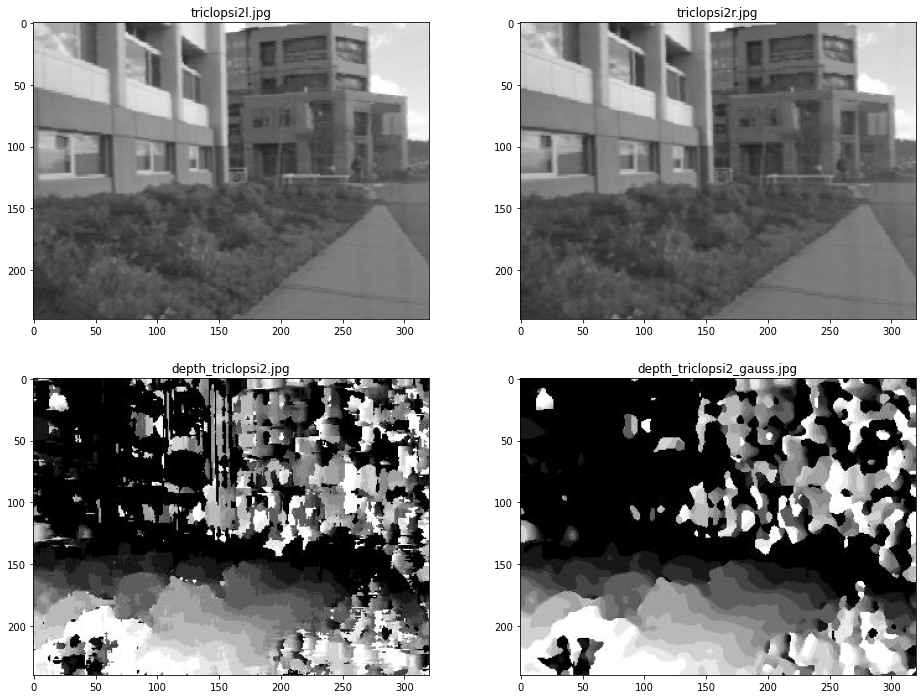

In [7]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)

plt.subplot(2, 2, 1)
plt.title("triclopsi2l.jpg")
plt.imshow(Image.open("../pictures/triclopsi2l.jpg"), cmap="gray")

plt.subplot(2, 2, 2)
plt.title("triclopsi2r.jpg")
plt.imshow(Image.open("../pictures/triclopsi2r.jpg"), cmap="gray")

plt.subplot(2, 2, 3)
plt.title("depth_triclopsi2.jpg")
plt.imshow(Image.open("../pictures/depth_triclopsi2.jpg"), cmap="gray")

plt.subplot(2, 2, 4)
plt.title("depth_triclopsi2_gauss.jpg")
plt.imshow(Image.open("../pictures/depth_triclopsi2_gauss.jpg"), cmap="gray")

plt.savefig("../pictures/triclopsi2_4comparisons.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

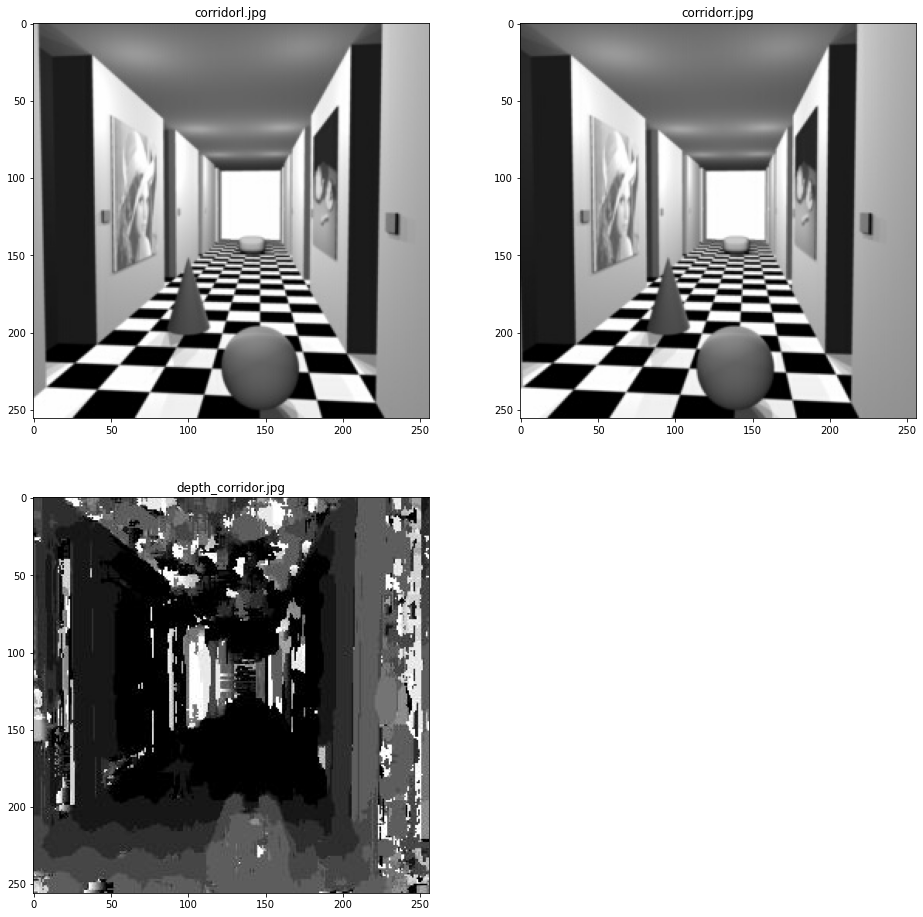

In [8]:
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplot(2, 2, 1)
plt.title("corridorl.jpg")
plt.imshow(Image.open("../pictures/corridorl.jpg"), cmap="gray")

plt.subplot(2, 2, 2)
plt.title("corridorr.jpg")
plt.imshow(Image.open("../pictures/corridorr.jpg"), cmap="gray")

plt.subplot(2, 2, 3)
plt.title("depth_corridor.jpg")
plt.imshow(Image.open("../pictures/depth_corridor.jpg"), cmap="gray")

plt.savefig("../pictures/corridor_3comparisons.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

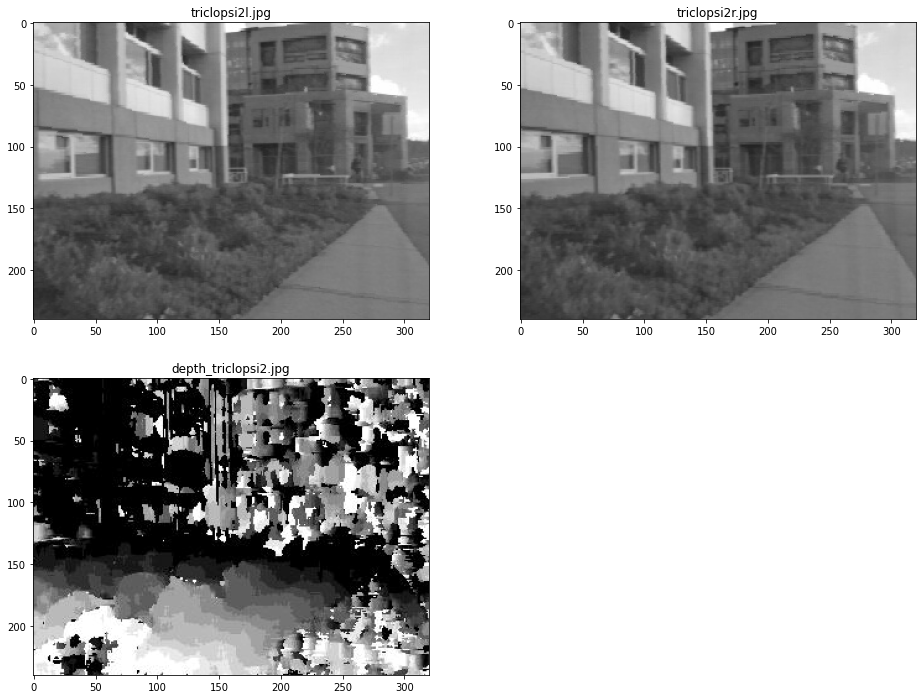

In [9]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)

plt.subplot(2, 2, 1)
plt.title("triclopsi2l.jpg")
plt.imshow(Image.open("../pictures/triclopsi2l.jpg"), cmap="gray")

plt.subplot(2, 2, 2)
plt.title("triclopsi2r.jpg")
plt.imshow(Image.open("../pictures/triclopsi2r.jpg"), cmap="gray")

plt.subplot(2, 2, 3)
plt.title("depth_triclopsi2.jpg")
plt.imshow(Image.open("../pictures/depth_triclopsi2.jpg"), cmap="gray")

plt.savefig("../pictures/triclopsi2_3comparisons.jpg")

## wid influence

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

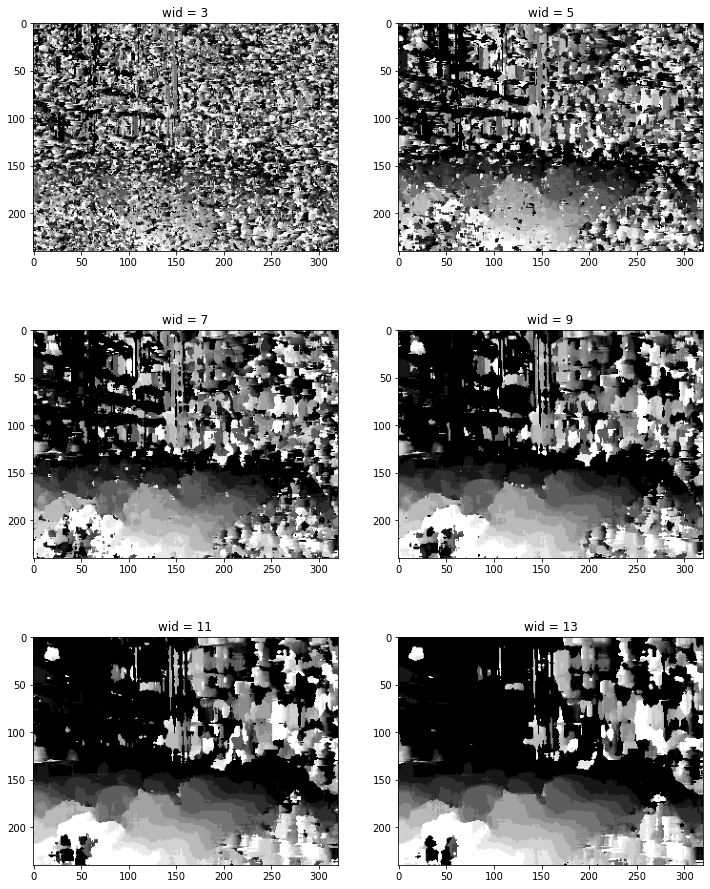

In [10]:
plt.rcParams['figure.figsize'] = (12.0, 16.0)
im_l = np.array(Image.open('../pictures/triclopsi2l.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/triclopsi2r.jpg').convert('L'), 'f')

# Set steps and starts
steps = 12
start = 4
for wid in range(3, 15, 2):
    res = plane_sweep_ncc(im_l, im_r, start, steps, wid)
    plt.subplot(3, 2, wid // 2)
    plt.title("wid = " + str(wid))
    plt.imshow(res, cmap="gray")
plt.savefig("../pictures/triclopsi2_ncc_wid.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

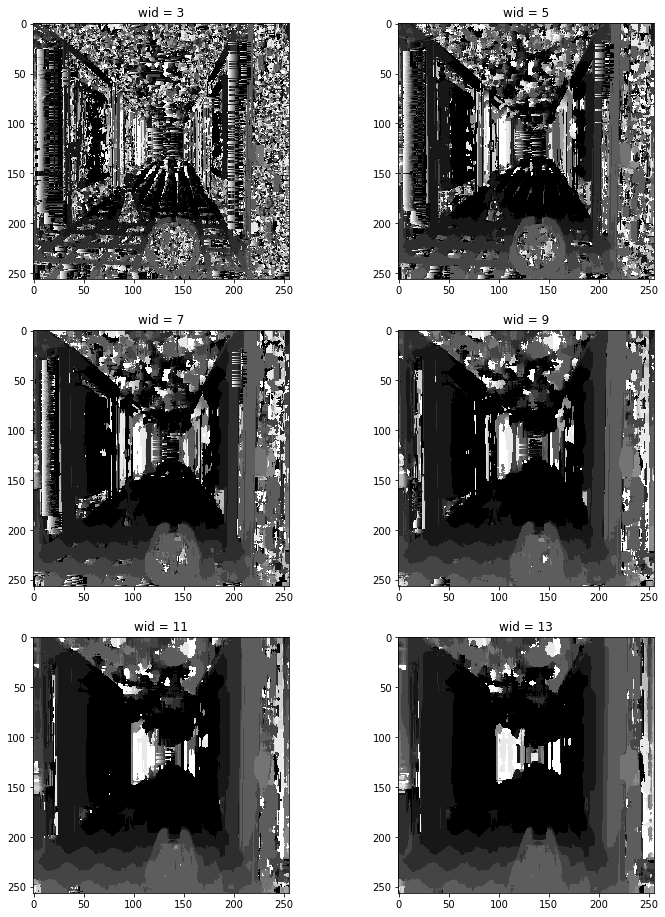

In [11]:
plt.rcParams['figure.figsize'] = (12.0, 16.0)
im_l = np.array(Image.open('../pictures/corridorl.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/corridorr.jpg').convert('L'), 'f')

# Set steps and starts
steps = 12
start = 4
for wid in range(3, 15, 2):
    res = plane_sweep_ncc(im_l, im_r, start, steps, wid)
    plt.subplot(3, 2, wid // 2)
    plt.title("wid = " + str(wid))
    plt.imshow(res, cmap="gray")
plt.savefig("../pictures/corridor_ncc_wid.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

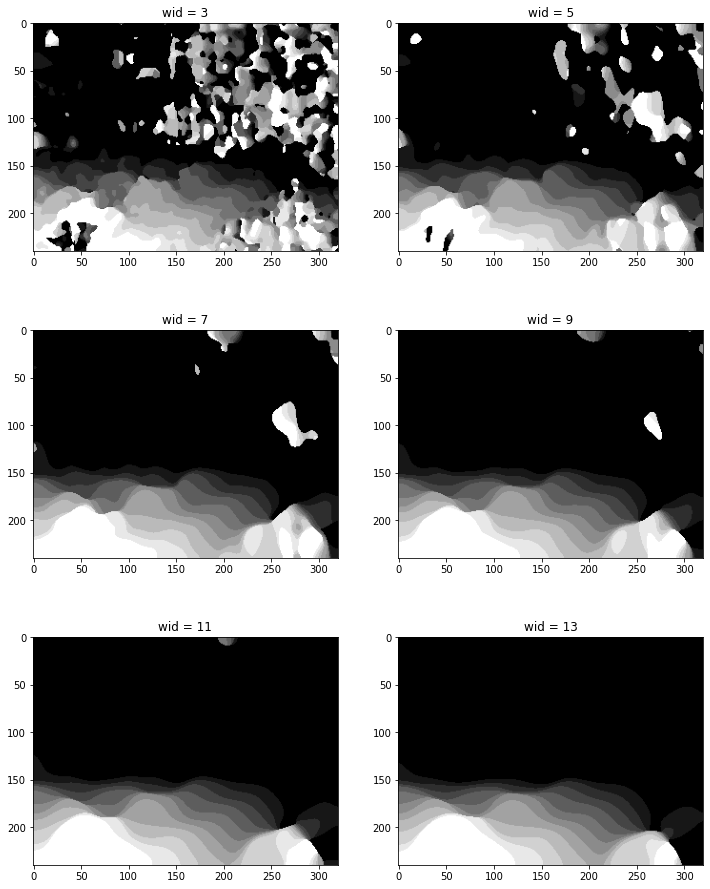

In [12]:
plt.rcParams['figure.figsize'] = (12.0, 16.0)
im_l = np.array(Image.open('../pictures/triclopsi2l.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/triclopsi2r.jpg').convert('L'), 'f')

# Set steps and starts
steps = 12
start = 4
for wid in range(3, 15, 2):
    res = plane_sweep_gauss(im_l, im_r, start, steps, wid)
    plt.subplot(3, 2, wid // 2)
    plt.title("wid = " + str(wid))
    plt.imshow(res, cmap="gray")
plt.savefig("../pictures/triclopsi2_gauss_wid.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

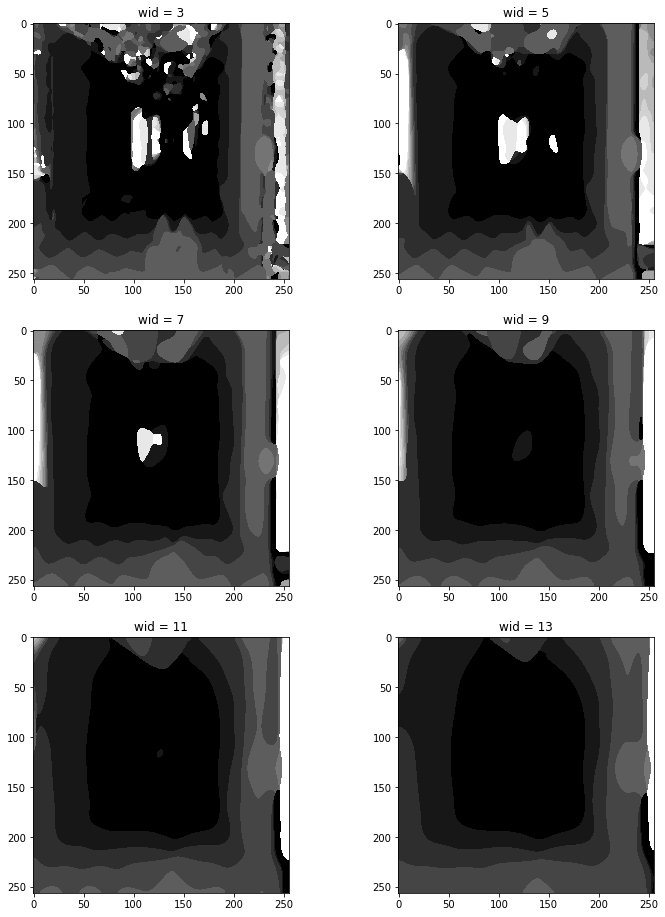

In [13]:
plt.rcParams['figure.figsize'] = (12.0, 16.0)
im_l = np.array(Image.open('../pictures/corridorl.jpg').convert('L'), 'f')
im_r = np.array(Image.open('../pictures/corridorr.jpg').convert('L'), 'f')

# Set steps and starts
steps = 12
start = 4
plt.title("corridor_gauss_wid")
for wid in range(3, 15, 2):
    res = plane_sweep_gauss(im_l, im_r, start, steps, wid)
    plt.subplot(3, 2, wid // 2)
    plt.title("wid = " + str(wid))
    plt.imshow(res, cmap="gray")
plt.savefig("../pictures/corridor_gauss_wid.jpg")